In [1]:
#import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from keras import Sequential,losses,layers,activations,optimizers,metrics
from keras import datasets

2024-04-24 03:58:37.542605: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
dir(datasets)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'boston_housing',
 'cifar10',
 'cifar100',
 'fashion_mnist',
 'imdb',
 'mnist',
 'reuters']

In [3]:
datasets.cifar10.load_data?

Signature: datasets.cifar10.load_data()
Docstring:
Loads the CIFAR10 dataset.

This is a dataset of 50,000 32x32 color training images and 10,000 test
images, labeled over 10 categories. See more info at the
[CIFAR homepage](https://www.cs.toronto.edu/~kriz/cifar.html).

The classes are:

| Label | Description |
|:-----:|-------------|
|   0   | airplane    |
|   1   | automobile  |
|   2   | bird        |
|   3   | cat         |
|   4   | deer        |
|   5   | dog         |
|   6   | frog        |
|   7   | horse       |
|   8   | ship        |
|   9   | truck       |

Returns:
  Tuple of NumPy arrays: `(x_train, y_train), (x_test, y_test)`.

**x_train**: uint8 NumPy array of grayscale image data with shapes
  `(50000, 32, 32, 3)`, containing the training data. Pixel values range
  from 0 to 255.

**y_train**: uint8 NumPy array of labels (integers in range 0-9)
  with shape `(50000, 1)` for the training data.

**x_test**: uint8 NumPy array of grayscale image data with shapes
  `(100

In [4]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [5]:
print(f"shape of x_train:{x_train.shape}")
print(f"shape of x_test:{x_test.shape}")
print(f"shape of y_train:{y_train.shape}")
print(f"shape of y_test:{y_test.shape}")

shape of x_train:(50000, 32, 32, 3)
shape of x_test:(10000, 32, 32, 3)
shape of y_train:(50000, 1)
shape of y_test:(10000, 1)


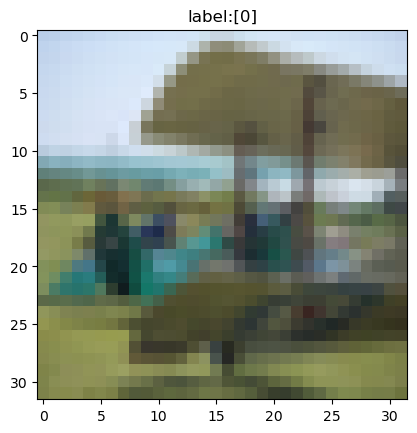

In [6]:
index=np.random.randint(0,len(x_train))
plt.imshow(x_train[index,:,:],cmap="gray")
plt.title(f"label:{y_train[index]}")
plt.show()

In [7]:
y_train[:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [8]:
#model architecture
model=Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPool2D())
model.add(layers.Conv2D(16,(3,3),activation='relu'))
model.add(layers.MaxPool2D())
model.add(layers.Conv2D(8,(3,3),activation='relu'))
model.add(layers.MaxPool2D())
model.add(layers.Flatten())
model.add(layers.Dense(10,activation='relu')) #softmax is used bcuz of multiclass
model.add(layers.Dense(10,activation='softmax'))


2024-04-24 03:58:47.511576: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [9]:
model.compile(optimizer='adam',loss='CategoricalCrossentropy',metrics=['accuracy']) #categoricalcrossentropy for multiclass data

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 16)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 8)           1160      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 8)           0

In [11]:
from keras.utils import to_categorical
y_train_cat=to_categorical(y_train)


In [12]:
y_train_cat.shape

(50000, 10)

In [ ]:
model.fit(x_train,y_train_cat,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 153s 97ms/step - loss: 2.3607 - accuracy: 0.0988
Epoch 2/10
1563/1563 [==============================] - 159s 102ms/step - loss: 2.3027 - accuracy: 0.0987
Epoch 3/10
1563/1563 [==============================] - 159s 102ms/step - loss: 2.3026 - accuracy: 0.0994
Epoch 4/10
1563/1563 [==============================] - 154s 98ms/step - loss: 2.3028 - accuracy: 0.0978
Epoch 5/10
1563/1563 [==============================] - 159s 102ms/step - loss: 2.3032 - accuracy: 0.1001
Epoch 6/10
1563/1563 [==============================] - 157s 100ms/step - loss: 2.3029 - accuracy: 0.0958
Epoch 7/10
 864/1563 [===============>..............] - ETA: 1:09 - loss: 2.3028 - accuracy: 0.0992